**IBA IT INDUSTRY READINESS BOOTCAMP PROGRAM** @ **FAST**



Faisal Ali | MID TERM EXAM TASK1 & TASK 2


---

TASK 1

Q1. Gender Classification

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA (countplots, show images, find missing values etc.)

a. Use Base SVM(LinearSVC) model.

b. Create a CNN model with 3 Conv2D layers, 3 Maxpooling2D layers, any extra layers necessary.

c. Get atleast 90% test accuracy using the above CNN model.

df: https://www.kaggle.com/dfsets/cashutosh/gender-classification-dfset

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import cv2


In [9]:
# This Data set is ctually a zip file containing two folders, Training and validation
# According to our teacher we used only taring folder for both training and testing
# here I am importing the file from my drive and unzip it to work on it

import zipfile
zip_file_path = "/content/drive/MyDrive/datasets/Gender_Classification_Dataset.zip"
destination_path = "/content/drive/MyDrive/datasets/"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_path)


In [10]:
male =  '/content/drive/MyDrive/datasets/Training/male'
female =  '/content/drive/MyDrive/datasets/Training/female'

In [11]:
male_files = [os.path.join(male, file) for file in os.listdir(male)]
female_files = [os.path.join(female, file) for file in os.listdir(female)]

# into dataframe
df = pd.DataFrame({"image_path": male_files + female_files, "gender": ["male"] * len(male_files) + ["female"] * len(female_files)})

In [12]:
# print(df.info())

display(df)

,image_path,gender
0,/content/drive/MyDrive/datasets/Training/male/...,male
1,/content/drive/MyDrive/datasets/Training/male/...,male
2,/content/drive/MyDrive/datasets/Training/male/...,male
3,/content/drive/MyDrive/datasets/Training/male/...,male
4,/content/drive/MyDrive/datasets/Training/male/...,male
...,...,...
47004,/content/drive/MyDrive/datasets/Training/femal...,female
47005,/content/drive/MyDrive/datasets/Training/femal...,female
47006,/content/drive/MyDrive/datasets/Training/femal...,female
47007,/content/drive/MyDrive/datasets/Training/femal...,female


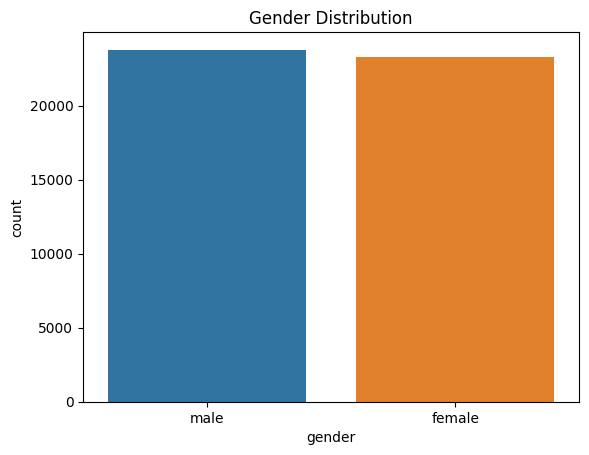

In [28]:
# Countplot for gender distribution
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()


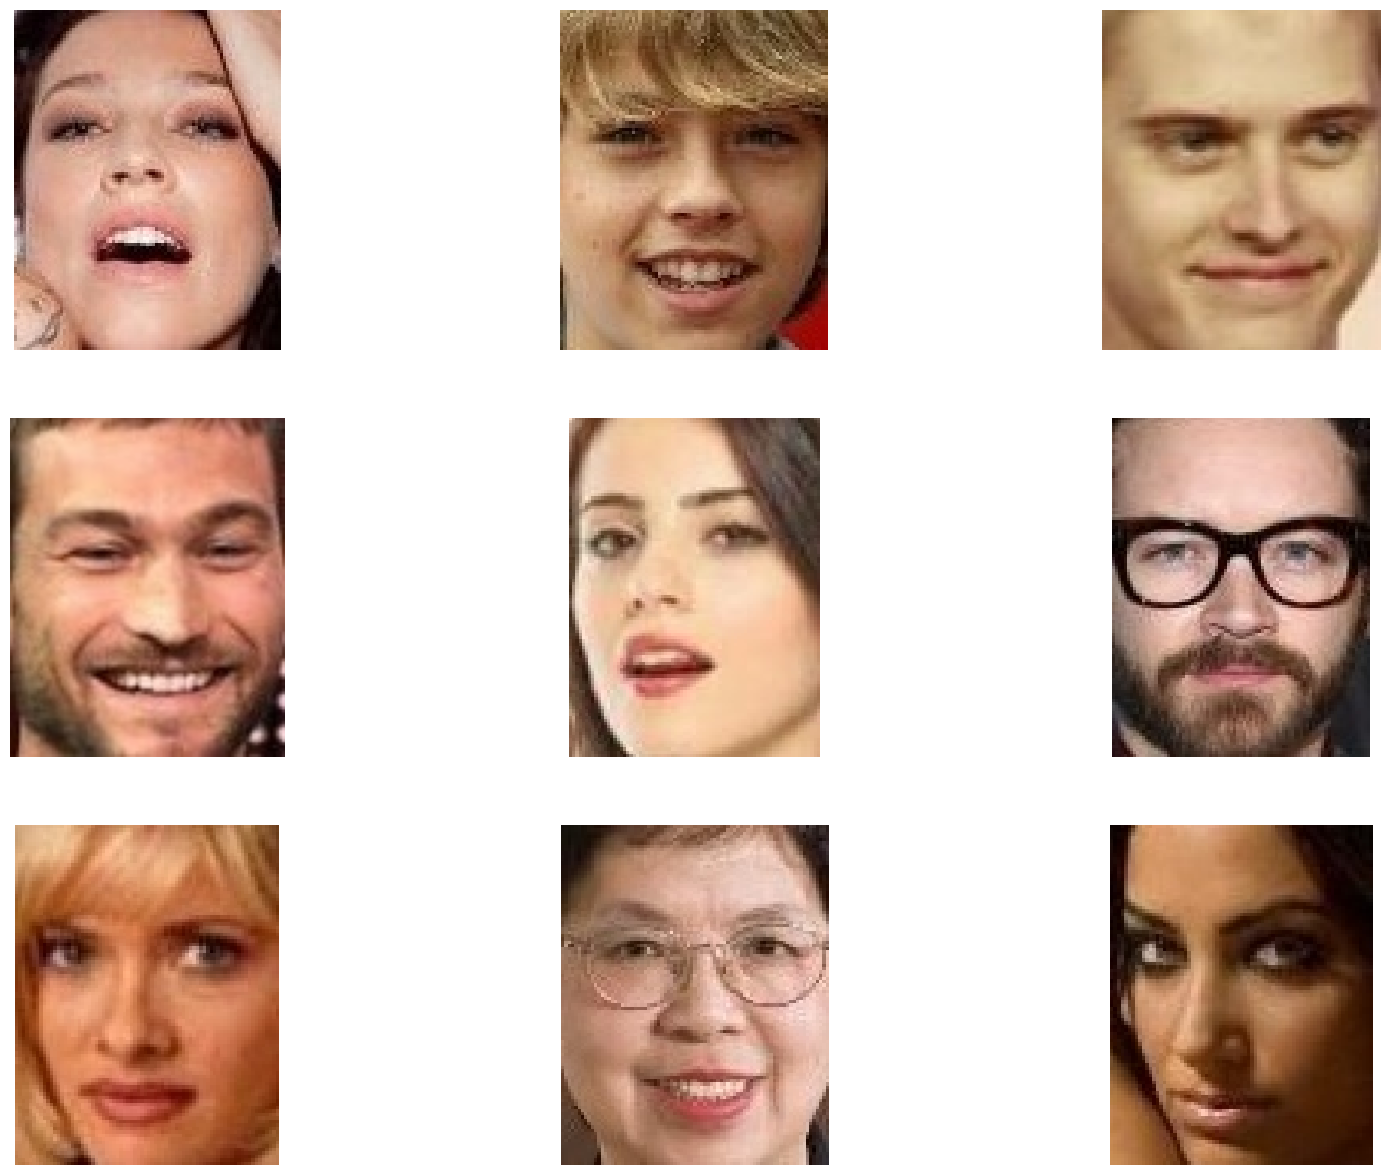

In [69]:
# Display sample images
def display_images(images):
    plt.figure(figsize=(20, 15))
    for i, image in enumerate(images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.axis("off")
    plt.show()

sample_images = df['image_path'].sample(9).apply(lambda x: np.array(Image.open(x)))
display_images(sample_images)


In [46]:
# seting the dataset
X = df['image_path']
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Load images and convert them to grayscale
image_size = (48, 48)
X_train_images = X_train.apply(lambda x: cv2.resize(cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2GRAY), image_size))
X_test_images = X_test.apply(lambda x: cv2.resize(cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2GRAY), image_size))

# Flatten images
X_train_flat = np.array([img.flatten() for img in X_train_images])
X_test_flat = np.array([img.flatten() for img in X_test_images])

# Initialize and train LinearSVC
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_flat, y_train)

# Predict and evaluate
svm_pred = svm_model.predict(X_test_flat)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("LinearSVC Accuracy:", svm_accuracy)

LinearSVC Accuracy: 0.8114231014677729


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:
# Convert gender labels to numerical format
gender_mapping = {"male": 0, "female": 1}
y_train_numeric = y_train.map(gender_mapping)
y_test_numeric = y_test.map(gender_mapping)

# Load images and preprocess them for CNN
X_train_cnn = X_train.apply(lambda x: np.array(Image.open(x).resize((48, 48))).astype('float32') / 255.0)
X_test_cnn = X_test.apply(lambda x: np.array(Image.open(x).resize((48, 48))).astype('float32') / 255.0)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(np.array(X_train_cnn.tolist()), y_train_numeric, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
cnn_loss, cnn_accuracy = model.evaluate(np.array(X_test_cnn.tolist()), y_test_numeric)
print("CNN Test Accuracy:", cnn_accuracy)



Epoch 1/10
1058/1058 [==============================] - 124s 115ms/step - loss: 0.2687 - accuracy: 0.8829 - val_loss: 0.1708 - val_accuracy: 0.9388
Epoch 2/10
1058/1058 [==============================] - 121s 115ms/step - loss: 0.1572 - accuracy: 0.9427 - val_loss: 0.1606 - val_accuracy: 0.9391
Epoch 3/10
1058/1058 [==============================] - 121s 114ms/step - loss: 0.1358 - accuracy: 0.9511 - val_loss: 0.1510 - val_accuracy: 0.9474
Epoch 4/10
1058/1058 [==============================] - 118s 111ms/step - loss: 0.1238 - accuracy: 0.9555 - val_loss: 0.1825 - val_accuracy: 0.9322
Epoch 5/10
1058/1058 [==============================] - 127s 120ms/step - loss: 0.1118 - accuracy: 0.9597 - val_loss: 0.1288 - val_accuracy: 0.9548
Epoch 6/10
1058/1058 [==============================] - 143s 135ms/step - loss: 0.1027 - accuracy: 0.9633 - val_loss: 0.1202 - val_accuracy: 0.9596
Epoch 7/10
1058/1058 [==============================] - 119s 113ms/step - loss: 0.0931 - accuracy: 0.9667 - val_



---



---



TASK 2

Q2. Cement Strength Regression

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA.

a. Use Linear, Ridge, and Lasso Regression.

b. Show results of the best model (least test data mean squared error) using a loop to compare the values.

c. Create any neural network you feel like making (RNN, CNN, ANN, or any other) and achieve a test data mean squared error lesser than the best model in part b.

>Data set link: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#I have saved this dataset to my drive so I am importing it from there
df = pd.read_csv('/content/drive/MyDrive/datasets/concrete_data.csv')
display(df)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
X = df.drop(columns=['Strength'])  # Features
y = df['Strength']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Appling models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Train models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict on test data
linear_pred = linear_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Calculate mean squared error
linear_mse = mean_squared_error(y_test, linear_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# MSE = Mean Squre Error
print(f"Linear Regression MSE: {linear_mse}")
print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")


Linear Regression MSE: 95.9709400911068
Ridge Regression MSE: 95.97089554036008
Lasso Regression MSE: 95.95939109138307


Using loop to find the lowest MSE

In [7]:
List = {
    'Linear Regression MSE': {linear_mse},
    'Ridge Regression MSE':{ridge_mse},
    'Lasso Regression MSE': {lasso_mse}
}

In [8]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple feedforward neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Regression task, so output layer has 1 neuron
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate on test data
nn_pred = model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_pred)
print(f"Neural Network MSE: {nn_mse}")


7/7 [==============================] - 0s 2ms/step
Neural Network MSE: 34.081509180130936
